<a href="https://colab.research.google.com/github/whitepanic/mlp/blob/main/3_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 유사도
- 자카도 유사도
- 코사인 유사도


In [2]:
import nltk   # Natural Language Toolkit
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [7]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death."

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.13333333333333333
0.11764705882352941


In [8]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


In [10]:
!pip install konlpy  # 파이썬 한국어 NLP

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 36.1MB/s 
     |████████████████████████████████| 92kB 11.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [12]:
# 한국어 형태소 분석기
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 P

In [18]:
import urllib.request

raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [20]:
raw_list: list = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw_list:
  reviews.append(i.split("\t")[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [21]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

In [23]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [25]:
# Word2Vec
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [26]:
word2vec.most_similar("영화")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('작품', 0.9731155037879944),
 ('마음', 0.9675828814506531),
 ('듯', 0.9674985408782959),
 ('이야기', 0.9647685289382935),
 ('표현', 0.9632787704467773),
 ('모든', 0.9595275521278381),
 ('인간', 0.9590599536895752),
 ('느낌', 0.9568455219268799),
 ('따뜻', 0.9561976790428162),
 ('에게', 0.9558918476104736)]

In [27]:
tsne = TSNE(n_components=2)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [28]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 4.3576895e-03, -1.5453139e-03,  1.7477019e-01, ...,
        -1.4980532e-01, -1.2141787e-01, -4.9173653e-02],
       [-2.3093309e-02, -7.2918870e-02,  2.5107074e-01, ...,
        -3.1780499e-01, -2.7929193e-01,  8.6103372e-02],
       [-4.2276025e-01,  1.4979020e-01,  5.6569487e-01, ...,
        -2.2285239e-01, -1.6067050e-02,  7.7075273e-02],
       ...,
       [ 7.8429244e-03, -7.1083088e-03,  2.3011349e-02, ...,
        -1.3377383e-02, -1.8874062e-02, -8.0949916e-03],
       [ 4.6581458e-03, -3.1408824e-03,  3.3877123e-02, ...,
        -2.7434466e-02, -2.4568357e-02,  6.2332692e-05],
       [ 1.0314781e-03, -1.2095602e-03,  3.1061608e-02, ...,
        -2.3073567e-02, -1.9545268e-02,  7.5037475e-03]], dtype=float32)

In [29]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])
df[0: 10]

,x,y
어릴,26.394335,8.546497
때,22.378075,51.720539
보,22.547031,56.660625
고,21.017035,56.056656
지금,23.695217,54.024529
다시,23.577127,55.785164
봐도,25.215977,54.610443
재밌,33.890663,54.683975
어요,33.621834,53.600708
ㅋㅋ,36.570431,53.137463


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


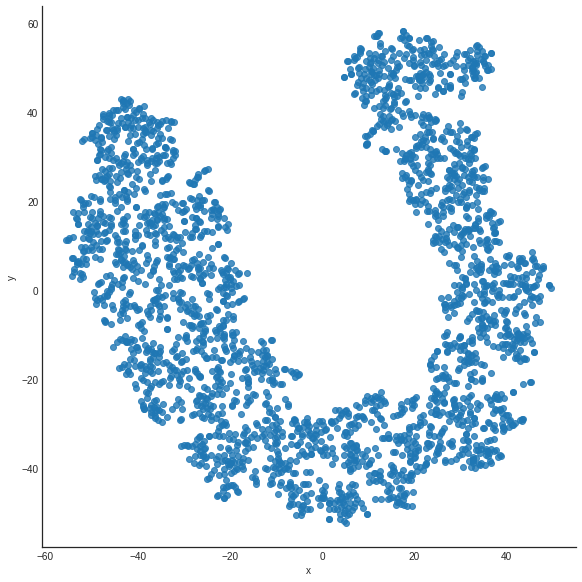

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

In [31]:
# 계층적 군집화
# ward 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침. (기본값)
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([0, 0, 0, ..., 2, 2, 2])

In [32]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,26.394335,8.546497,0
때,22.378075,51.720539,0
보,22.547031,56.660625,0
고,21.017035,56.056656,0
지금,23.695217,54.024529,0
다시,23.577127,55.785164,0
봐도,25.215977,54.610443,0
재밌,33.890663,54.683975,0
어요,33.621834,53.600708,0
ㅋㅋ,36.570431,53.137463,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


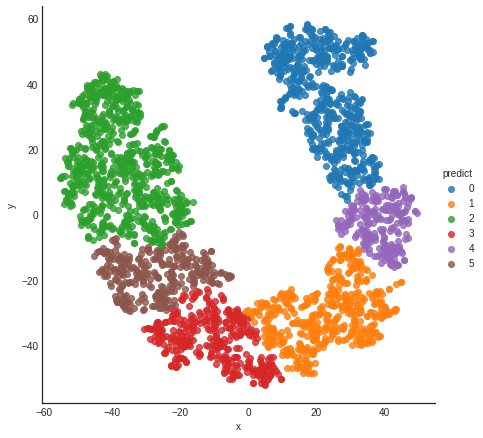

In [33]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue="predict" )
plt.show()

In [36]:
# average 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침.
avg = AgglomerativeClustering(n_clusters=10, linkage="average")
predict_avg = avg.fit_predict(df)
predict_avg

array([5, 3, 3, ..., 6, 6, 6])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


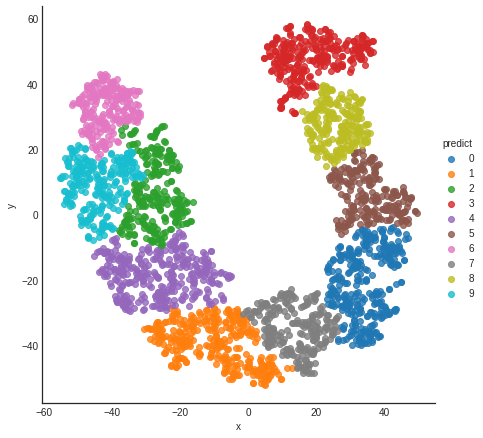

In [37]:
results_avg = df
results_avg['predict'] = predict_avg
results_avg[0:10]

sns.lmplot('x', 'y', data=results_avg, fit_reg=False, size=6, hue="predict" )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


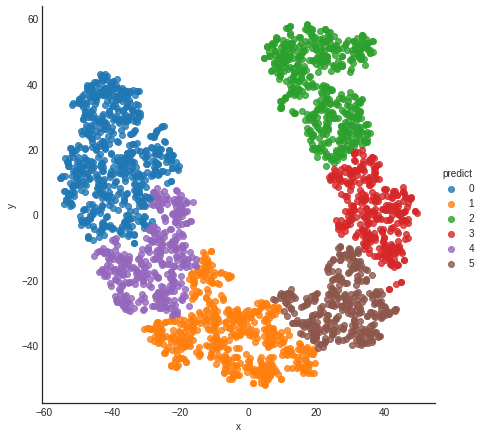

In [39]:
# complete 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침.
coml = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict_coml = coml.fit_predict(df)
results_coml = df
results_coml['predict'] = predict_coml
results_coml[0:10]

sns.lmplot('x', 'y', data=results_coml, fit_reg=False, size=6, hue="predict" )
plt.show()

In [41]:
#Scipy 거리를 이용한
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,43.371975,48.278060,47.823953,45.569031,47.333163,46.089865,46.753201,45.641195,45.748302,49.182838,44.712071,49.063936,60.385711,44.404657,45.943220,73.010919,44.775578,47.636655,47.251211,46.851005,80.719147,41.481300,50.183859,49.155991,46.399536,45.719461,45.725325,36.876101,16.786283,44.671050,30.373100,45.401964,45.854426,62.462328,31.200355,45.382440,39.971458,34.065468,41.310794,...,57.793195,57.242239,47.403530,72.490003,67.957860,76.843634,57.146058,55.195249,65.726257,74.231451,59.487207,53.837411,56.361659,72.159747,80.810232,68.826423,75.121258,74.536412,70.393680,45.397231,72.935956,66.206163,52.858558,34.602909,56.267250,77.480055,74.047434,53.125844,67.205526,65.830406,52.586196,77.850138,54.172065,75.140451,71.492541,66.289872,63.636773,71.617569,78.638712,77.301618
1,43.371975,0.000000,4.942975,4.544705,2.653909,4.237795,4.050337,11.887878,11.399875,14.262911,14.358355,16.444041,14.232777,101.014695,13.239068,16.431273,87.984738,16.392000,15.367009,15.423360,11.115464,74.424330,84.336572,92.366719,7.243884,12.097767,89.085815,9.784864,8.315506,29.259626,12.328451,13.079697,14.453285,3.666339,84.888763,13.240568,14.630277,3.605012,15.656034,83.603530,...,71.667367,72.096176,62.124958,74.146971,59.282844,75.372425,85.724334,64.761635,94.466019,65.201318,88.037254,58.965192,56.858880,62.845994,90.708798,65.577577,78.659323,65.985793,62.800733,62.736068,65.228601,65.132192,62.667095,77.952749,84.390052,81.925567,64.527904,65.656529,88.141064,77.724505,75.873082,73.182889,88.129833,73.923436,81.299047,59.714229,68.261792,62.259531,69.809792,69.754744
2,48.278060,4.942975,0.000000,1.644892,2.875298,1.351862,3.365489,11.514562,11.489749,14.459198,14.505619,18.235480,14.408559,105.908822,15.026667,17.875631,91.337276,18.164077,16.201864,16.391876,11.836461,75.883722,89.149069,97.305384,5.303238,13.101074,93.991079,9.754845,12.424606,33.896784,14.003508,18.020237,15.958056,4.221109,88.836416,18.102928,16.149573,8.507727,19.812315,88.358514,...,75.160845,75.658793,65.861445,76.487838,60.832014,77.359470,90.061890,68.041275,98.759359,66.539484,92.357762,62.004267,59.516976,64.211600,93.588015,67.586802,81.107214,67.363311,64.379475,66.643327,66.728524,67.389551,66.015764,82.863023,88.709818,84.409498,65.822431,69.152196,91.951420,80.957113,79.972024,74.857140,92.754108,75.966602,84.295958,61.504659,71.018974,63.635924,71.061577,71.164452
3,47.823953,4.544705,1.644892,0.000000,3.361875,2.574448,4.441019,12.946604,12.841832,15.824975,12.900953,16.598012,12.801287,105.062375,13.394780,16.231170,89.797441,16.526051,14.563974,14.750526,10.194186,74.244663,88.855214,96.602001,3.849613,11.456429,93.527698,11.100178,12.625914,33.800618,12.369427,17.471607,14.315544,2.736337,87.423333,17.278843,14.507162,7.863843,18.540571,88.138729,...,73.648253,74.159073,64.401730,74.854061,59.190350,75.716062,88.783244,66.495319,97.460369,64.903764,91.071341,60.427997,57.904556,62.574801,91.988893,65.944157,79.478056,65.726316,62.737363,65.225896,65.088081,65.753365,64.481124,82.385028,87.423952,82.781961,64.188253,67.641753,90.501880,79.401239,78.606875,73.213777,91.626890,74.324068,82.710057,59.860663,69.412079,61.998742,69.429497,69.526643
4,45.569031,2.653909,2.875298,3.361875,0.000000,1.764591,1.629726,10.216750,9.935660,12.905736,15.453131,18.301525,15.339330,103.519138,15.060604,18.142274,90.472274,18.241008,16.796882,16.914395,12.421532,76.263820,86.349353,94.770395,7.033819,13.555318,91.276097,8.216327,9.550247,31.043160,14.088789,15.437003,16.169274,4.303252,87.501486,15.812189,16.354614,6.195413,18.278229,85.531920,...,74.186661,74.631780,64.696072,76.319864,61.149266,77.417687,88.376522,67.224669,97.116646,66.9

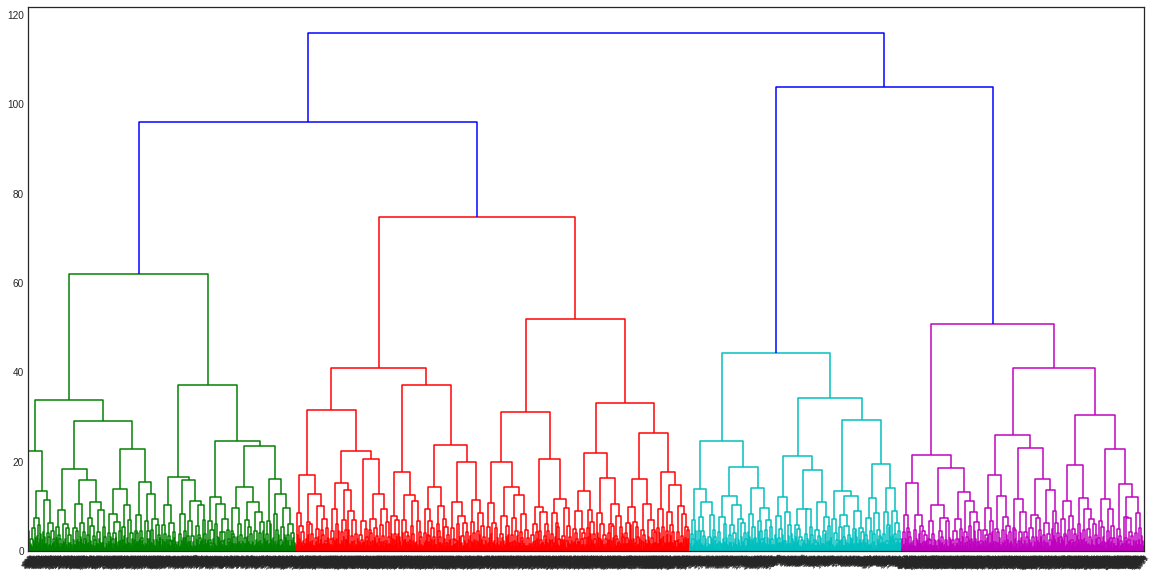

In [42]:
row_clusters = linkage(distmatrix, method="complete")
plt.figure(figsize=(20, 10))
dendrogram(row_clusters, leaf_rotation=50, leaf_font_size=7)
plt.show()

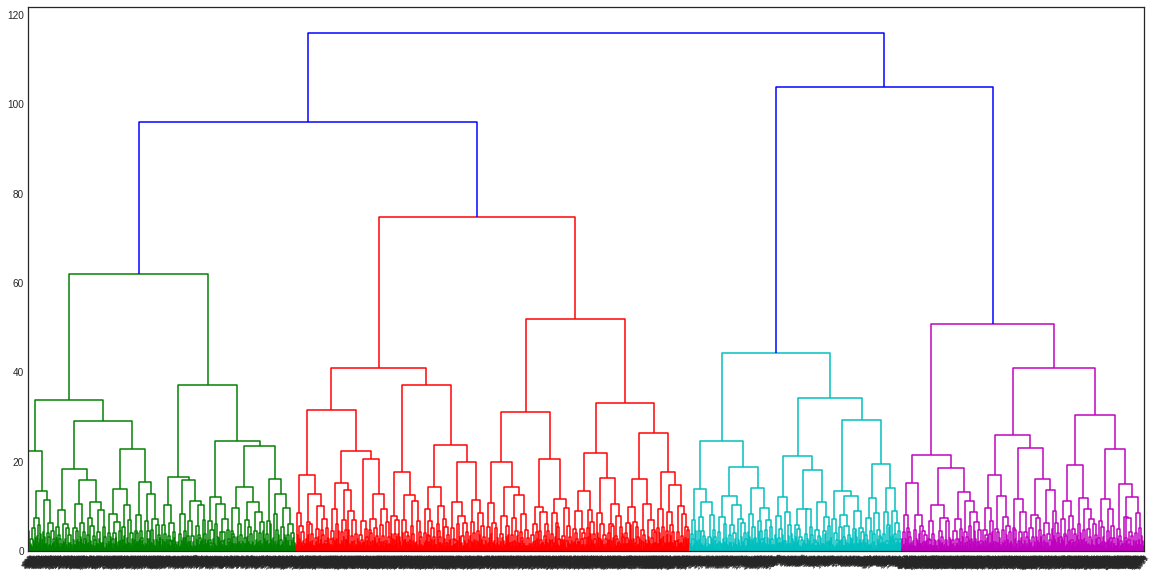

In [44]:
mergings = linkage(df, method="complete")
plt.figure(figsize=(20,10))
dendrogram(mergings, leaf_rotation=50, leaf_font_size=7)
plt.show()

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
predict_k = kmeans.fit_predict(df)
results_k = df
results_k["predict"] = predict
results_k[0:10]

,x,y,predict
어릴,26.394335,8.546497,0
때,22.378075,51.720539,0
보,22.547031,56.660625,0
고,21.017035,56.056656,0
지금,23.695217,54.024529,0
다시,23.577127,55.785164,0
봐도,25.215977,54.610443,0
재밌,33.890663,54.683975,0
어요,33.621834,53.600708,0
ㅋㅋ,36.570431,53.137463,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


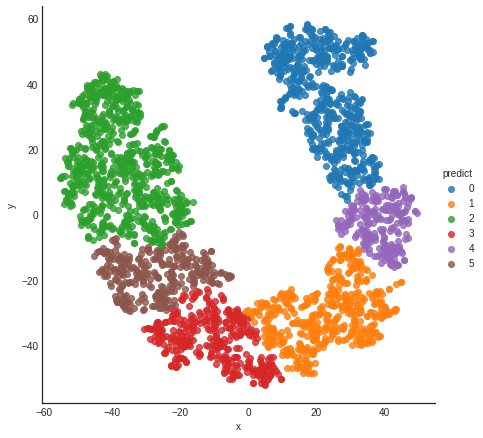

In [47]:
sns.lmplot("x", "y", data=results_k, fit_reg=False, size=6, hue="predict")
plt.show()